Let's install the important stuff

In [2]:
%pip install qiskit qiskit-ibm-runtime qiskit-aer
!pip install pylatexenc matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 38.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 50.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 52.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 24.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 5.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     

# Quantum Fourier Transform & Shor's Algorithm

## Objectives
* Understand the Quantum Fourier Transform
* Implement a 5-qubit version of QFT and run on a real device
* Integrate the QFT into a version of Shor's Algorithm

This lab is the mutant child of https://qiskit.org/textbook/ch-algorithms/quantum-fourier-transform.html and https://qiskit.org/textbook/ch-algorithms/shor.html

In mathematics, a Fourier transform is a transform that decomposes functions depending on space or time into functions depending on frequencies, such as the expression of a musical chord in terms of frequencies of its constituent notes.  In quantum mechanics, we often use it to transform wave functions in terms of position $|\psi(x)\rangle$ into wave functions in terms of momentum $|\psi(p)\rangle$.  Generally the Fourier transform $\hat{f}(\xi)$ is given by an integral on the original function $f(x)$:

$$ \hat{f}(\xi) = \int_{-\infty}^{\infty} f(x)\ e^{-2\pi i x \xi}\,dx$$

This integral can be approximated by a discrete fourier transform (DFT), which has wide application in digital signal processing, image processing, and solving differential equations.  In fact, a large amount of the applications you use every day depend critically on the discrete fourier transform.

The <b>quantum Fourier transform</b> (for short: QFT which doesn't cause any confusion with Quantum Field Theory which also is abbreviated QFT) is the quantum analogue of the DFT and was invented in 1994. While it doesn't perform faster on classical data than the DFT, QFT is a part of many quantum algorithms that are faster than classical ones, notably Shor's algorithm and the quantum phase estimation.

Shor's algorithm, as you have by now heard ad nauseam about, is a method for factorizing a numbers faster than a classical computer can do alone by leveraging quantum computers.  It was invented in 1997 and was one of the first quantum algorithms that demonstrated <b>quantum advantage</b> for a <b>useful problem</b> because of the prime factorization of numbers is key to cryptography.

## What is a Discrete Fourier Transform?

The discrete Fourier transform acts on a N-component vector $(x_0, ..., x_{N-1})$ and maps it to the N-component vector $(y_0, ..., y_{N-1})$ according to the formula


$$y_k = \frac{1}{\sqrt{N}}\sum_{j=0}^{N-1}x_j\omega_N^{jk}$$


where $\omega_N^{jk} = e^{2\pi i \frac{jk}{N}}$.

Similarly, the quantum Fourier transform acts on a quantum state $\vert X\rangle = \sum_{j=0}^{N-1} x_j \vert j \rangle$ and maps it to the quantum state $\vert Y\rangle = \sum_{k=0}^{N-1} y_k \vert k \rangle$ according to the formula


$$y_k = \frac{1}{\sqrt{N}}\sum_{j=0}^{N-1}x_j\omega_N^{jk}$$


with $\omega_N^{jk}$ defined as above. Note that only the amplitudes of the state were affected by this transformation.

This can also be expressed as the map:


$$\vert j \rangle \mapsto \frac{1}{\sqrt{N}}\sum_{k=0}^{N-1}\omega_N^{jk} \vert k \rangle$$



Or better yet, as unitary matrix we can put onto the quantum computer:


$$ U_{QFT} = \frac{1}{\sqrt{N}} \sum_{j=0}^{N-1} \sum_{k=0}^{N-1} \omega_N^{jk} \vert k \rangle \langle j \vert$$



## Intuition <a id="intuition"></a>

The quantum Fourier transform (QFT) transforms between two bases, the computational (Z) basis, and the Fourier basis. The H-gate is the single-qubit QFT, and it transforms between the Z-basis states $|0\rangle$ and $|1\rangle$ to the X-basis states $|{+}\rangle$ and $|{-}\rangle$. In the same way, all multi-qubit states in the computational basis have corresponding states in the Fourier basis. The QFT is simply the function that transforms between these bases.

$$
|\text{State in Computational Basis}\rangle \quad \xrightarrow[]{\text{QFT}} \quad |\text{State in Fourier Basis}\rangle
$$

$$
\text{QFT}|x\rangle = |\widetilde{x}\rangle
$$

(We often note states in the Fourier basis using the tilde (~)).

In the computational basis, we store numbers in binary using the states $|0\rangle$ and $|1\rangle$:

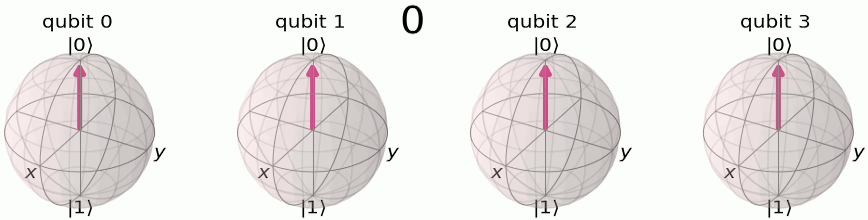

Note the frequency with which the different qubits change; the leftmost qubit flips with every increment in the number, the next with every 2 increments, the third with every 4 increments, and so on. In the Fourier basis, we store numbers using different rotations around the Z-axis:

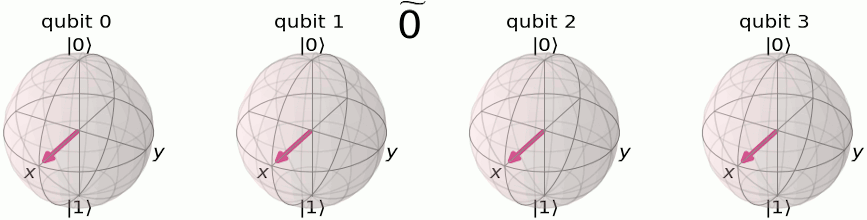

The number we want to store dictates the angle at which each qubit is rotated around the Z-axis. In the state $|\widetilde{0}\rangle$, all qubits are in the state $|{+}\rangle$. As seen in the example above, to encode the state $|\widetilde{5}\rangle$ on 4 qubits, we rotated the leftmost qubit by $\tfrac{5}{2^n} = \tfrac{5}{16}$ full turns ($\tfrac{5}{16}\times 2\pi$ radians). The next qubit is turned double this ($\tfrac{10}{16}\times 2\pi$ radians, or $10/16$ full turns), this angle is then doubled for the qubit after, and so on.

Again, note the frequency with which each qubit changes. The leftmost qubit (`qubit 0`) in this case has the lowest frequency, and the rightmost the highest.


## The 1-qubit QFT

Consider how the QFT operator as defined above acts on a single qubit state $\vert\psi\rangle = \alpha \vert 0 \rangle + \beta \vert 1 \rangle$. In this case, $x_0 = \alpha$, $x_1 = \beta$, and $N = 2$. Then, using the definition of QFT,

$$y_k = \frac{1}{\sqrt{N}}\sum_{j=0}^{N-1}x_j\omega_N^{jk}$$

we find

$$y_0 = \frac{1}{\sqrt{2}}\left(\alpha \exp\left(2\pi i\frac{0\times0}{2}\right) + \beta \exp\left(2\pi i\frac{1\times0}{2}\right) \right) = \frac{1}{\sqrt{2}} \left(\alpha + \beta\right)$$

In the next line, or on paper at home, can you <b>determine $y_1$</b> ?

Hopefully, you were <b>discovered</b> that:

$$y_1 = \frac{1}{\sqrt{2}}\left(    \alpha \exp\left(2\pi i\frac{0\times1}{2}\right) + \beta \exp\left(2\pi i\frac{1\times1}{2}\right)      \right) = \frac{1}{\sqrt{2}}\left(\alpha - \beta\right)$$



such that the final result is the state



$$U_{QFT}\vert\psi\rangle = \frac{1}{\sqrt{2}}(\alpha + \beta) \vert 0 \rangle + \frac{1}{\sqrt{2}}(\alpha - \beta)  \vert 1 \rangle$$



This operation is exactly the result of applying the Hadamard operator:



$$H = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$$


## The Quantum Fourier transform<a id="qfteqn"></a>

So what does the quantum Fourier transform look like for larger $N$? Let's derive a transformation for $N=2^n$, $QFT_N$ acting on the state $\vert x \rangle = \vert x_1\ldots x_n \rangle$ where $x_1$ is the most significant bit.  Important to understanding this is that $x$ can be thought of as a an integer given by the binary bit string $x_1 x_2 ...x_n$, e.g. $|5\rangle$ could represent 4 qubits in a state $|0101\rangle$.

$$
\begin{aligned}
QFT_N\vert x \rangle & = \frac{1}{\sqrt{N}} \sum_{y=0}^{N-1}\omega_N^{xy} \vert y \rangle
\\
& = \frac{1}{\sqrt{N}}\begin{pmatrix} \omega^{00}_N & \omega^{10}_N& \cdots & \omega^{N0}_N\\ \omega^{01}_N & \omega^{11}_N & \cdots & \omega^{N1}_N\\ \cdots & \cdots & \cdots & \cdots\\ \omega^{0N}_N & \omega^{1N}_N & \cdots & \omega^{NN}_N\end{pmatrix}\begin{pmatrix}y_0\\ y_1 \\ \cdots \\ y_N\end{pmatrix}
\\
& = \frac{1}{\sqrt{N}} \sum_{y=0}^{N-1} e^{2 \pi i xy / 2^n} \vert y \rangle ~\text{since}\: \omega_N^{xy} = e^{2\pi i \frac{xy}{N}} \:\text{and}\: N = 2^n
\\
& = \frac{1}{\sqrt{N}} \sum_{y=0}^{N-1} e^{2 \pi i \left(\sum_{k=1}^n y_k/2^k\right) x} \vert y_1 \ldots y_n \rangle \:\text{rewriting in fractional binary notation}\: y = y_1\ldots y_n, y/2^n = \sum_{k=1}^n y_k/2^k
\\
& = \frac{1}{\sqrt{N}} \sum_{y=0}^{N-1} \prod_{k=1}^n e^{2 \pi i x y_k/2^k } \vert y_1 \ldots y_n \rangle \:\text{after expanding the exponential of a sum to a product of exponentials}
\\
& = \frac{1}{\sqrt{N}} \bigotimes_{k=1}^n  \left(\vert0\rangle + e^{2 \pi i x /2^k } \vert1\rangle \right) \:\text{after rearranging the sum and products, and expanding}
\sum_{y=0}^{N-1} = \sum_{y_1=0}^{1}\sum_{y_2=0}^{1}\ldots\sum_{y_n=0}^{1}
\\
& = \frac{1}{\sqrt{N}}
\left(\vert0\rangle + e^{\frac{2\pi i}{2}x} \vert1\rangle\right)
\otimes
\left(\vert0\rangle + e^{\frac{2\pi i}{2^2}x} \vert1\rangle\right)
\otimes  
\ldots
\otimes
\left(\vert0\rangle + e^{\frac{2\pi i}{2^{n-1}}x} \vert1\rangle\right)
\otimes
\left(\vert0\rangle + e^{\frac{2\pi i}{2^n}x} \vert1\rangle\right)
\end{aligned}
$$

# The Circuit

The circuit that implements QFT makes use of two gates: $H$, and $CROT_k$. This controlled rotation $CROT_k$ is given in block-diagonal form as

$$CROT_k = \left[\begin{matrix}
I&0\\
0&UROT_k\\
\end{matrix}\right]$$

where

$$UROT_k = \left[\begin{matrix}
1&0\\
0&\exp\left(\frac{2\pi i}{2^k}\right)\\
\end{matrix}\right]$$

The action of $CROT_k$ on a two-qubit state $\vert x_l x_j\rangle$ where the first qubit is the control and the second is the target is given by



$$CROT_k\vert 0x_j\rangle = \vert 0x_j\rangle$$


and


$$CROT_k\vert 1x_j\rangle = \exp\left( \frac{2\pi i}{2^k}x_j \right)\vert 1x_j\rangle$$

So what does this gate do?  When the control bit $x_l=|0>$, it does nothing.  But when $x_l=|1>$, we perform a give a phase dependent on the parameter $k$ to $x_j$.

But Hank, you say, <b>this is kinda cheating to just invent a gate and say, that's the gate I need</b>.  Don't worry, we will get to how to transpile it later in this lab.


Given these two gates, the QFT circuit is:

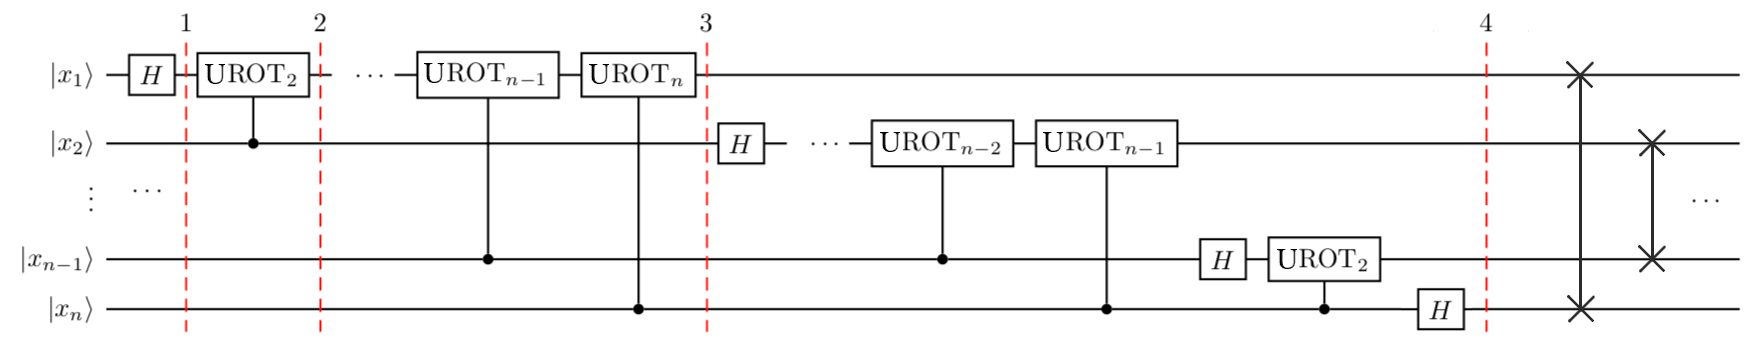

The circuit operates as follows:

We start with an n-qubit input state $\vert x_1x_2\ldots x_n\rangle$.

Then, the red lines with numbers with them correspond to the steps:

<ol>
<li> After the first Hadamard gate on qubit 1, the state is transformed from the input state to

$$
H_1\vert x_1x_2\ldots x_n\rangle =
\frac{1}{\sqrt{2}}
\left[\vert0\rangle + \exp\left(\frac{2\pi i}{2}x_1\right)\vert1\rangle\right]
\otimes
\vert x_2x_3\ldots x_n\rangle
$$

<li> After the $UROT_2$ gate on qubit 1 controlled by qubit 2, the state is transformed to

$$
\frac{1}{\sqrt{2}}
\left[\vert0\rangle + \exp\left(\frac{2\pi i}{2^2}x_2 + \frac{2\pi i}{2}x_1\right)\vert1\rangle\right]
\otimes
\vert x_2x_3\ldots x_n\rangle
$$

<li> After the application of the last $UROT_n$ gate on qubit 1 controlled by qubit $n$, the state becomes

$$
\frac{1}{\sqrt{2}}
\left[\vert0\rangle +
\exp\left(
\frac{2\pi i}{2^n}x_n +
\frac{2\pi i}{2^{n-1}}x_{n-1} +
\ldots +
\frac{2\pi i}{2^2}x_2 +
\frac{2\pi i}{2}x_1
\right)
\vert1\rangle\right]
\otimes
\vert x_2x_3\ldots x_n\rangle
$$

Noting that

$$
x = 2^{n-1}x_1 + 2^{n-2}x_2 + \ldots + 2^1x_{n-1} + 2^0x_n
$$

we can write the above state as

$$
\frac{1}{\sqrt{2}}
\left[\vert0\rangle +
\exp\left(
\frac{2\pi i}{2^n}x
\right)
\vert1\rangle\right]
\otimes
\vert x_2x_3\ldots x_n\rangle
$$

<li> After the application of a similar sequence of gates for qubits $2\ldots n$, we find the final state to be:

$$
\frac{1}{\sqrt{2}}
\left[\vert0\rangle +
\exp\left(
\frac{2\pi i}{2^n}x
\right)
\vert1\rangle\right]
\otimes
\frac{1}{\sqrt{2}}
\left[\vert0\rangle +
\exp\left(
\frac{2\pi i}{2^{n-1}}x
\right)
\vert1\rangle\right]
\otimes
\ldots
\otimes
\frac{1}{\sqrt{2}}
\left[\vert0\rangle +
\exp\left(
\frac{2\pi i}{2^{2}}x
\right)
\vert1\rangle\right]
\otimes
\frac{1}{\sqrt{2}}
\left[\vert0\rangle +
\exp\left(
\frac{2\pi i}{2^{1}}x
\right)
\vert1\rangle\right]
$$

which is exactly the QFT of the input state as derived above <b>with the caveat that the order of the qubits is reversed in the output state.</b>  Which is why after 4., we must remember that this reversal has happened, or  might swap all the qubits as shown in the circuit.


## Another example: The 3-qubit QFT

The steps to creating the circuit for $\vert y_3y_2y_1\rangle = QFT_8\vert x_3x_2x_1\rangle$ would be:

<ol>
<li> Apply a Hadamard gate to $\vert x_1 \rangle$

$$
\psi_1 =
\vert x_3\rangle
\otimes
\vert x_2\rangle
\otimes
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle +
\exp\left(\frac{2\pi i}{2}x_1\right)
\vert1\rangle\right]
$$

<li> Apply a $UROT_2$ gate to $\vert x_1\rangle$ depending on $\vert x_2\rangle$

$$
\psi_2 =
\vert x_3\rangle
\otimes
\vert x_2\rangle
\otimes
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle +
\exp\left(
\frac{2\pi i}{2^2}x_2 + \frac{2\pi i}{2}x_1
\right)
\vert1\rangle\right]
$$

<li> Apply a $UROT_3$ gate to $\vert x_1\rangle$ depending on $\vert x_3\rangle$

$$
\psi_3 =
\vert x_3\rangle
\otimes
\vert x_2\rangle
\otimes
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle +
\exp\left(
\frac{2\pi i}{2^3}x_3 + \frac{2\pi i}{2^2}x_2 + \frac{2\pi i}{2}x_1
\right)
\vert1\rangle\right]
$$

<li> Apply a Hadamard gate to $\vert x_2 \rangle$

$$
\psi_4 =
\vert x_3\rangle
\otimes
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle +
\exp\left(
\frac{2\pi i}{2}x_2
\right)
\vert1\rangle\right]
\otimes
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle +
\exp\left(
\frac{2\pi i}{2^3}x_3 + \frac{2\pi i}{2^2}x_2 + \frac{2\pi i}{2}x_1
\right)
\vert1\rangle\right]
$$

<li> Apply a $UROT_2$ gate to $\vert x_2\rangle$ depending on $\vert x_3\rangle$

$$
\psi_5 =
\vert x_3\rangle
\otimes
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle +
\exp\left(
\frac{2\pi i}{2^2}x_3 + \frac{2\pi i}{2}x_2
\right)
\vert1\rangle\right]
\otimes
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle +
\exp\left(
\frac{2\pi i}{2^3}x_3 + \frac{2\pi i}{2^2}x_2 + \frac{2\pi i}{2}x_1
\right)
\vert1\rangle\right]
$$

<li> Apply a Hadamard gate to $\vert x_3\rangle$

$$
\psi_6 =
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle +
\exp\left(
\frac{2\pi i}{2}x_3
\right)
\vert1\rangle\right]
\otimes
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle +
\exp\left(
\frac{2\pi i}{2^2}x_3 + \frac{2\pi i}{2}x_2
\right)
\vert1\rangle\right]
\otimes
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle +
\exp\left(
\frac{2\pi i}{2^3}x_3 + \frac{2\pi i}{2^2}x_2 + \frac{2\pi i}{2}x_1
\right)
\vert1\rangle\right]
$$


<li> Keep in mind the reverse order of the output state relative to the desired QFT. Therefore, we must reverse the order of the qubits (in this case swap $y_1$ and $y_3$).

## Qiskit Implementation<a id='implementation'></a>

In Qiskit, the implementation of the $CROT$ gate used in the discussion above is a controlled phase rotation gate. This gate is defined in [OpenQASM](https://github.com/QISKit/openqasm) as

$$
CP(\theta) =
\begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & e^{i\theta}\end{bmatrix}
$$

Hence, the mapping from the $CROT_k$ gate in the discussion above into the $CP$ gate is found from the equation

$$
\theta = 2\pi/2^k = \pi/2^{k-1}
$$

## Let's code the 3 Qubit Case <a id="threeqft"></a>

First, in the next cell, we need to import a number of things:

* Import the <b>numpy</b> module as np so we can do various numerical methods
* Specifically import from the numpy module <b>pi</b>, so we can use it in math
* From qiskit, we need QuantumCircuit, transpile in order to build the circuit and run it
* To debug and see our results, we want to get <b>plot_histogram</b> & <b>plot_bloch_multivector</b> from qiskit.visualization
* To do the simulations, we want AerSimulator imported from qiskit_aer
* To do the noisy simulatings, we need to import GenericBackendV2
* Further, we need to import from `qiskit.transpiler.preset_passmanagers` the  fucntion `generate_preset_pass_manager`
* And finally, we need to import `SamplerV2` as `Sampler` from `qiskit_ibm_runtime`

In [3]:
# numpy
import numpy as np

#pi
from numpy import pi


# importing stuff to build circuits
from qiskit import QuantumCircuit, transpile


# importing plotting tools
from qiskit.visualization import plot_histogram, plot_bloch_multivector


#import AerSimulator
from qiskit_aer import AerSimulator

# import a fake backend
from qiskit.providers.fake_provider import GenericBackendV2

#import the pass manager for transpiling
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

#import the sampler protocol
from qiskit_ibm_runtime import SamplerV2 as Sampler

Step one is to define our circuit, let's call it <b>qc</b> with the QuantumCircuit(). For now, lets have a circuit with 3 qubits and 0 classical bits.

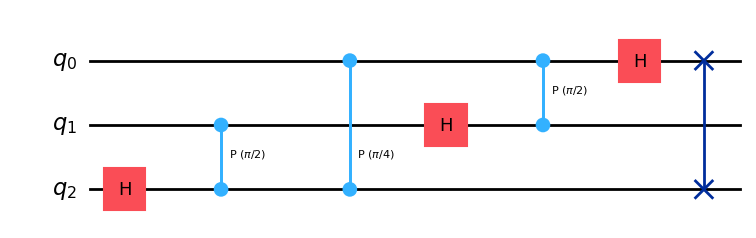

In [4]:
qc = QuantumCircuit(3,0)

#prepping qubit 2
qc.h(2)

qc.cp(pi/2, 1, 2)
qc.cp(pi/4, 0, 2)

#prepping qubit 1
qc.h(1)
qc.cp(pi/2, 0, 1)

qc.h(0)

qc.swap(0,2)

qc.draw('mpl')

**Note**: Remember that Qiskit's least significant bit has the lowest index

*   List item
*   List item

(0), thus the circuit will be mirrored through the horizontal in relation to the image above. First, you should <b>apply a H-gate to qubit 2 and draw the circuit</b>  (You may want to use the option 'mpl' for a cleaner image

Next, we want to <b>rotate this qubit's $|1\rangle$ a quarter turn ($\pi/2$) if qubit 1 is in the state $|1\rangle$</b>.  To do this, we need the new controlled-phase gate $CP(\theta)$

    circuit.cp(theta,controll_qubit,target qubit)
    
Again, let's also draw the circuit to check our work

In [5]:
qc.cp(pi/2, 0, 1)
qc.draw()

┌───┐            
q_0: ───────────────■─────────────■───────┤ H ├─X──■───────
                    │       ┌───┐ │P(π/2) └───┘ │  │P(π/2) 
q_1: ──────■────────┼───────┤ H ├─■─────────────┼──■───────
     ┌───┐ │P(π/2)  │P(π/4) └───┘               │          
q_2: ┤ H ├─■────────■───────────────────────────X──────────
     └───┘

As the final act on qubit 2, we need to perform a eighth turn ($\pi/4$) if the least significant qubit (q0) is $|1\rangle$.  This again requires $CP(\theta)$

With that, q2 is fully treated and we can now ignore it and repeat the process, using the same logic for qubits 1 and 0 following the same procedure.

If we want to directly compare our circuit to expectations, we should swap the qubits 0 and 2.  In QISKIT two qubits can be swapped by:

    circuit.swap(qubit_1, qubit_2)

## General QFT Function

Hopefully, you feel a little bit more comfortable with the QFT after working out the 3-qubit example in QISKIT.  Now we will generalize this to the $n-$qubit case by creating a function for the QFT.

It is perhaps easier to build a circuit that implements the QFT with the qubits upside down, then swap them afterwards; we will start off by creating the function that rotates our qubits correctly.

Because programmers are cheeky, they like to implement <b>recursive</b> functions when possible.  These functions utilize nested calls to themselves in order to evaluate desired results. Before we make this function recursive, lets make sure we get it right for the most significant qubit.

* Define a function `qft_rotations` which takes in arguments `circuit` and `n`.  `circuit` will be the `QuantumCircuit` we want to add the gates to, and `n` tells us which qubit we are manipulating in the particular stage of the QFT.

* The first thing your function should do is check if there is still a qubit to apply the rotations to.  This should check if `n` equals 0.  If so, it should <b>return the circuit</b>.

* Next, we want to <b>decrease n by 1</b>.  This can compactly be done by the syntax

    `n -= 1`
    
  Which is equivalent to `n=n-1`
  
* Then, we should <b>apply a Hadamard to the n-th qubit</b>

* Then we need to apply the controlled rotations.  For this, we can <b>loop over a variable "qubits" from 0 to n-1</b>

* Inside the for loop, we need to apply `circuit.cp()` with `qubit` as the control and `n` as the target.  The angles should be changing depending on `qubit`
            
The formula for a given $\theta_{qubit}$ is             
$$\theta_{qubit}=\frac{\pi}{2^{n-qubit}}$$
  

In [6]:
#Define the function qft_rotations with arguments circuit and n
def qft_rotations(circuit, n):
    print(n)
    #Check if n is equal to 0
    if n <= 0:
      return circuit
        #If n was zero, return the current state of the circuit

    n -= 1

    circuit.h(n)

    #Apply a for-loop for qubit in the range(n)
    for qubits in range(0, n):
      theta = pi/(2**(n - qubits))
      circuit.cp(theta, qubits, n)

        # For each less significant qubit, we need to do a
        # smaller-angled controlled rotation:
    return qft_rotations(circuit, n)


Let's test this for <b>four qubits</b>

To do this, we need to:

* Define qc as a 4 qubit `QuantumCircuit`
* Call the function `qft_rotations` with `qc` as the `circuit` and `n` as 4
* Draw the circuit

In [7]:
qc = QuantumCircuit(4)
qft_qc = qft_rotations(qc, n=4)
print(qft_qc)


4
3
2
1
0
                                                                          ┌───┐
q_0: ──────■───────────────────────────────■──────────────────────■───────┤ H ├
           │                               │                ┌───┐ │P(π/2) └───┘
q_1: ──────┼────────■──────────────────────┼────────■───────┤ H ├─■────────────
           │        │                ┌───┐ │P(π/4)  │P(π/2) └───┘              
q_2: ──────┼────────┼────────■───────┤ H ├─■────────■──────────────────────────
     ┌───┐ │P(π/8)  │P(π/4)  │P(π/2) └───┘                                     
q_3: ┤ H ├─■────────■────────■─────────────────────────────────────────────────
     └───┘                                                                     


Hurray! You should have completed the first, and hardest step of implementing th QFT. Now we need to correctly rotate the rest of the qubits. But why write a bunch more code? This is where you can be clever and utilize recursion.

When we get to the end of our `qft_rotations()` function, you should recognize that really what we would want to do is implement `qft_rotations()` again, but with `n` smaller by 1.  But that is just what value `n` is currently storing in inside of `qft_rotations()`.  So all we need to do is add a call to `qft_rotations(circuit,n)` to the end of our definition of `qft_rotations()`

For the final step, we should swaps the qubits properly.

* Define a function `swap_registers` which takes in arguments `circuit` and `n` which is the total number of qubits.
* In this function, create a for loop over the variable `qubit` in the range $n/2$.  Because this code should work for odd or even numbers of qubits, you should implement n/2 with the syntax `n//2` which performs division and rounds to the nearest integer.
* Within the for loop, we want to swap the qubits given by `qubit` and `n-qubit-1`
* Outside the for loop, we can return the circuit to finish swap function.

Then, we can combine `swap_registers` and `qft_rotations` into a final function `qft()`.

* Create a function `qft` which takes in arguments `circuit` and `n`, performs `qft_rotations`, `swap_registers` and then returns a circuit
* Check your `qft` function for 4 qubits by drawing the circuit.


3
2
1
0


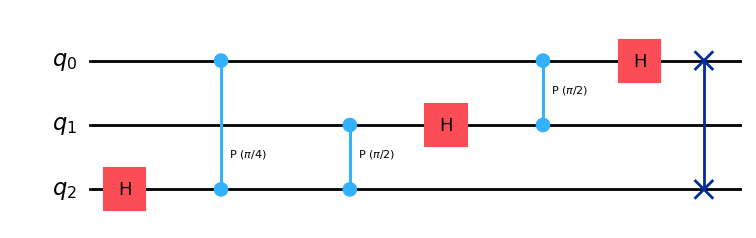

In [10]:
#Define swap_registers
def swap_registers(circuit, n):
    # Make a for loop over the range of n/2
    for i in range(n//2):
        #Swap the right qubits
        circuit.swap(i, n-i-1)
    #Return the circuit
    return circuit


#Define qft
def qft(circuit, n):
    #call qft_rotations
    qft_rotations(circuit,n)

    #call swap_registers
    swap_registers(circuit,n)

    #return the circuit
    return circuit


# Let's see how it looks on a 4 qubit circuit
qc4 = QuantumCircuit(3)
qc4 = qft(qc4, 3)
qc4.draw('mpl')

We now want to demonstrate this circuit works correctly. To do this we must first encode a number in the computational basis. We can see the number 5 in binary is `101`:

In [11]:
bin(5)

'0b101'

(The `0b` just reminds us this is a binary number). Let's encode this into our qubits:

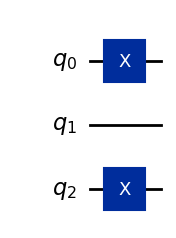

In [12]:
# Create the circuit for 3 qubits
qc = QuantumCircuit(3)

# Encode the state 5 which is 101
qc.x(0)
qc.x(2)
# Hint, this should take two gates


#Draw the circuit to make sure you encoded correctly
qc.draw('mpl')


With the aer_simulator, we can check our state is $|101\rangle$ with the following syntax

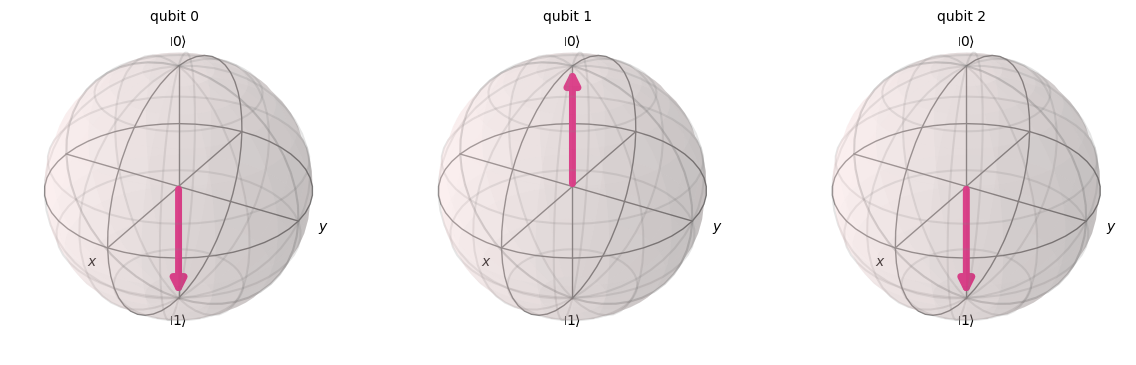

In [13]:
#Define the simulator backend `sim`
sim = AerSimulator()

#So as not to mess with our circuit going forward, we define a new circuit qc_init by copying the old one
qc_init = qc.copy()

#We add to the circuit a call to save the quantum state
qc_init.save_statevector()

#We then run the simulator and save the statevector to a new variable
statevector = sim.run(qc_init).result().get_statevector()

#And here we plot the statevector as a bloch sphere for each qubit
plot_bloch_multivector(statevector)

Finally, let's use run our QFT function and view the final state of our qubits:

3
2
1
0


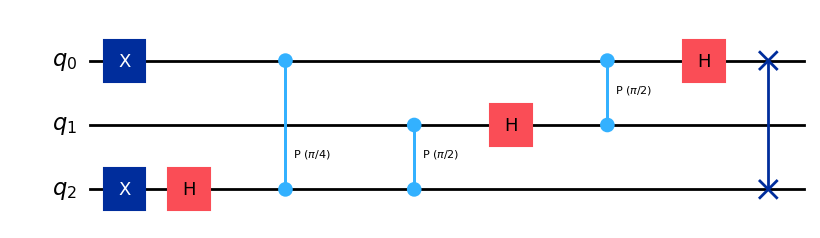

In [14]:
#Implement your qft function and draw the circuit
qc = qft(qc, n=3)
qc.draw('mpl')

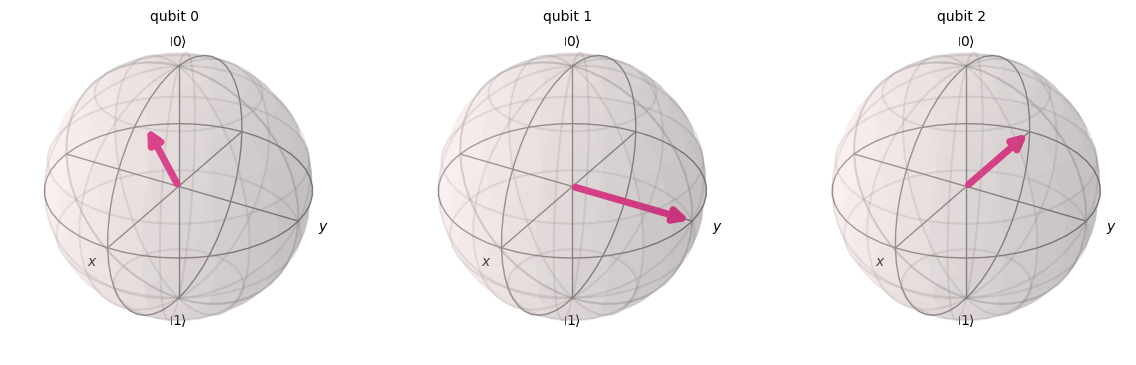

In [15]:
#add a save_statevector() to your quantum circuit
qc.save_statevector()

#Run the simulator `sim` using `qc` instead of `qc_init`, and save the state_vector to a variable
state_vector = sim.run(qc).result().get_statevector()

#Plot the state after the QFT as a set of bloch spheres
plot_bloch_multivector(state_vector)


We can see out QFT function has worked correctly. Compared the state $|\widetilde{0}\rangle = |{+}{+}{+}\rangle$, Qubit 0 has been rotated by $\tfrac{5}{8}$ of a full turn, qubit 1 by $\tfrac{10}{8}$ full turns (same as $\tfrac{1}{4}$), and qubit 2 by $\tfrac{20}{8}$ full turns (same as $\tfrac{1}{2}$).

## Running QFT with a Noise Model

It would be silly to run our QFT code on a real device because all the qubits are in equal superposition of $|0\rangle$ and $|1\rangle$. Instead, we could investigate the QFT by creating the state $|\widetilde{5}\rangle$, run the QFT in reverse, and verify the output is $|5\rangle$.

This might sound like I made you do an immense amount of work for nothing.  But wait!  quantum circuits are unitary matrices $U$ at their heart, and thus the reverese of them is $U^{-1}$.  QISKIT has a handy function `circuit.inverse()` which takes a quantum circuit and produces its inverse.

Now, when we perform `circuit.inverse()`, QISKIT doesn't immediately decompose this new gate into individual ones, so we must tell it to do so with `circuit.decompose()`.  For complicated $U$, this could take a bit of time.

Below, I have implemented for you the inverse gate

In [16]:
def inverse_qft(circuit, n):
    """Does the inverse QFT on the first n qubits in circuit"""
    # First we create a QFT circuit of the correct size:
    qft_circ = qft(QuantumCircuit(n), n)
    # Then we take the inverse of this circuit
    invqft_circ = qft_circ.inverse()
    # And add it to the first n qubits in our existing circuit
    circuit.append(invqft_circ, circuit.qubits[:n])
    return circuit.decompose() # .decompose() allows us to see the individual gates

Now let's put our qubits in the state $|\widetilde{5}\rangle$:

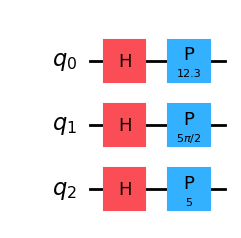

In [17]:
nqubits = 3
number = 5
qc = QuantumCircuit(nqubits)

#First we need a for loop over the range nqubits that places a H on each
for i in range(nqubits):
  qc.h(i)

#Then we need a for loop over qubits that places a phase number*pi/2^{nqubits-qubit-1}
#To add a phase `theta` to a `qubit`, use the syntax `circuit.p(theta,qubit)`
for qubit in range(nqubits):
  theta = number*(pi/2)**(nqubits-qubit-1)
  qc.p(theta, qubit)

#draw to check
qc.draw('mpl')


And we can see this does indeed result in the Fourier state $|\widetilde{5}\rangle$:

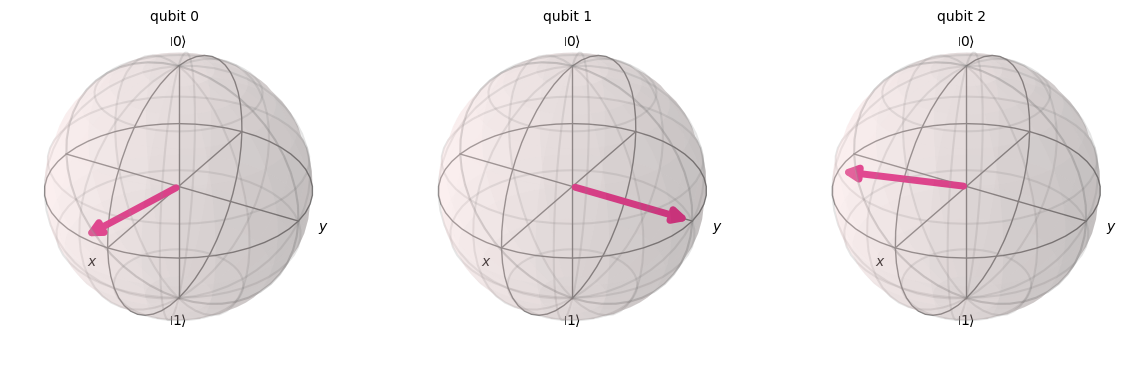

In [18]:
qc_init = qc.copy()
qc_init.save_statevector()
sim = AerSimulator()
statevector = sim.run(qc_init).result().get_statevector()
plot_bloch_multivector(statevector)

Finally, let's apply our inverse QFT:

3
2
1
0


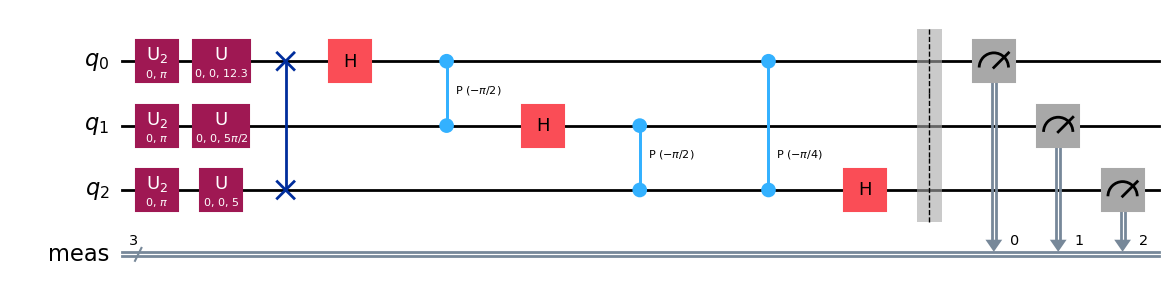

In [19]:
qc = inverse_qft(qc, nqubits)

#Here is a handy function, measure_all().  It can be added to measure all qubits at the end of your circuit
#instead of writing multiple measure statements.
qc.measure_all()

#check by drawing
qc.draw('mpl')

<ipython-input-21-ae1036895290>:12: DeprecationWarning: The 'backend' keyword arguments are deprecated as of qiskit-ibm-runtime 0.24.0 and will be removed no sooner than 3 months after the release date. Please use the 'mode' parameter instead.
  sampler = Sampler(backend=backend, options=options)


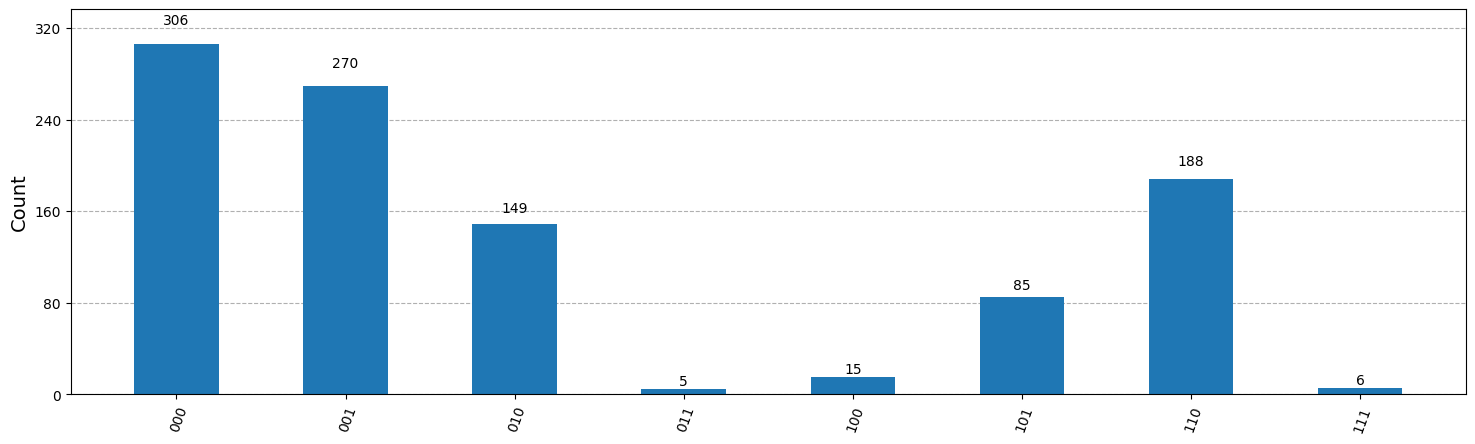

In [21]:
#Set up the noisy backend
backend = GenericBackendV2(num_qubits=7,coupling_map=[[0,1],[1,2],[1,3],[3,5],[4,5],[5,6]])

#Transpile
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)
transpiled_circuit = pm.run(qc)

# You can use a fixed seed to get fixed results.
options = {"simulator": {"seed_simulator": 42}}

#Set up the Sampler simulater backend
sampler = Sampler(backend=backend, options=options)

#Run the circuits, and get results
result = sampler.run([transpiled_circuit]).result()

#Plot the result
plot_histogram(result[0].data.meas.get_counts(),figsize=(18,5))

Did you get the right answer (101) every time?  Most of the time?  Any of the time?